# <span style="color:#0F19C9">Contents</span>

- [Importing and loading data](#importing-and-loading-data)
- [Understanding data](#understanding-data)
- [Aisles Dataframe](#aisles-dataframe)
- [Department Dataframe](#departments-dataframe)
- [Orders Dataframe](#orders-dataframe)
- [Orders Products Prior Dataframes](#orders-products-prior-dataframes)
- [Orders Products Train Dataframes](#orders-products-train-dataframes)
- [Product Dataframe](#products-dataframe)
- [Analysis InterDataframes](#analysis-interdataframes)

# <span style="color:#0F19C9">Importing and loading data</span>

We are going to import every library we need for the notebook, we will start with pandas for the dataframe manipulation, os for readibility of files, matplotlib for visualization because of the weight of their objects are enough for the project and seaborn because of some plots like violins and pairplots.

In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [2]:
# Import my color palette
juan_colors = ['#101B4B', '#545E85', '#A3A8B2',
               '#E7E7E7', '#0F19C9', '#F6D673']

# Crear la paleta de colores personalizada
colors = [juan_colors[5], juan_colors[0]]
juan_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Setting plot font
plt.rc('font', family='Georgia', size=12)

In [3]:
# Give the route of the main folder and get the files names
folder = '../Data/Raw/'
files = [file for file in os.listdir(folder)]

# Read each csv file, create the dataframes and a dictionary
dfs = {}
for file in files:
    name = file.split('.')[0]  # Get the name without the extension
    route = folder + name + '.csv'
    dfs[name] = pd.read_csv(route)

# <span style="color:#0F19C9">Understanding data</span>

Later we import every dataframe and store them in a dictionary, we find the first basic info and correct the first format. We fill count every null value of every column of every dataframe and check if some rows are duplicated. Then we will rewrite the columns name formatting the first character in capital letter.

In [4]:
# Show dataframes basic info
names = [dataframe for dataframe in dfs.keys()]
count_rows = [dataframe.shape[0] for dataframe in dfs.values()]
count_columns = [dataframe.shape[1] for dataframe in dfs.values()]
count_null = [dataframe.isna().sum().sum()
              for dataframe in dfs.values()]
count_duplicates = [dataframe.duplicated().sum()
                    for dataframe in dfs.values()]

# Write data in dataframe
info = {'Dataframe_Name': names,
        'Rows': count_rows,
        'Columns': count_columns,
        'Null_Values': count_null,
        'Duplicated_Values': count_duplicates}
basic_info = pd.DataFrame(info)
basic_info

,Dataframe_Name,Rows,Columns,Null_Values,Duplicated_Values
0,aisles,134,2,0,0
1,departments,21,2,0,0
2,orders_1,2000000,7,120182,0
3,orders_2,1421083,7,86027,0
4,orders_products__prior_1,2000000,4,0,0
5,orders_products__prior_10,2000000,4,0,0
6,orders_products__prior_11,2000000,4,0,0
7,orders_products__prior_12,2000000,4,0,0
8,orders_products__prior_13,2000000,4,0,0
9,orders_products__prior_14,2000000,4,0,0


In [5]:
# Find the column with null values
dfs['orders_1'].isna().sum().sort_values(ascending=False).index[0]

'days_since_prior_order'

In [6]:
# Find the column with null values
dfs['orders_2'].isna().sum().sort_values(ascending=False).index[0]

'days_since_prior_order'

In [7]:
# Find the column names
for dataframe in dfs.values():
    dataframe.columns = [old_col.title() for old_col in dataframe.columns]
    print(f'Column names: {dataframe.columns.to_list()}')

Column names: ['Aisle_Id', 'Aisle']
Column names: ['Department_Id', 'Department']
Column names: ['Order_Id', 'User_Id', 'Eval_Set', 'Order_Number', 'Order_Dow', 'Order_Hour_Of_Day', 'Days_Since_Prior_Order']
Column names: ['Order_Id', 'User_Id', 'Eval_Set', 'Order_Number', 'Order_Dow', 'Order_Hour_Of_Day', 'Days_Since_Prior_Order']
Column names: ['Order_Id', 'Product_Id', 'Add_To_Cart_Order', 'Reordered']
Column names: ['Order_Id', 'Product_Id', 'Add_To_Cart_Order', 'Reordered']
Column names: ['Order_Id', 'Product_Id', 'Add_To_Cart_Order', 'Reordered']
Column names: ['Order_Id', 'Product_Id', 'Add_To_Cart_Order', 'Reordered']
Column names: ['Order_Id', 'Product_Id', 'Add_To_Cart_Order', 'Reordered']
Column names: ['Order_Id', 'Product_Id', 'Add_To_Cart_Order', 'Reordered']
Column names: ['Order_Id', 'Product_Id', 'Add_To_Cart_Order', 'Reordered']
Column names: ['Order_Id', 'Product_Id', 'Add_To_Cart_Order', 'Reordered']
Column names: ['Order_Id', 'Product_Id', 'Add_To_Cart_Order', 'Reo

In [8]:
# Count the original dataframes
print(f'We start with {len(dfs)} dataframes')

We start with 24 dataframes


In [9]:
# Write the dataframes names
dfs.keys()

dict_keys(['aisles', 'departments', 'orders_1', 'orders_2', 'orders_products__prior_1', 'orders_products__prior_10', 'orders_products__prior_11', 'orders_products__prior_12', 'orders_products__prior_13', 'orders_products__prior_14', 'orders_products__prior_15', 'orders_products__prior_16', 'orders_products__prior_17', 'orders_products__prior_2', 'orders_products__prior_3', 'orders_products__prior_4', 'orders_products__prior_5', 'orders_products__prior_6', 'orders_products__prior_7', 'orders_products__prior_8', 'orders_products__prior_9', 'order_products__train', 'products', 'sample_submission'])

We can work with a dictionary that contains the name of each file as key and the dataframe as value.

We only found that just two dataframes have null values: `orders_1` and `orders_2`. And both have the null values in the column `days_since_prior_order`. And we do not have duplicates in any dataframe.

Finally, we fixed the columns name writting the first letter in capital in every 24 dataframes. We start with 24 files but we are going to concatenate some of them later in the same dictionary.

# <span style="color:#0F19C9">Aisles Dataframe</span>

In the aisle dataframe we found two columns, the `Aisle_Id` and `Aisle` that are enough for us. We will only check if the information is correct.

In [10]:
# Check the number of aisles ID
dfs['aisles'].shape[0] == dfs['aisles']['Aisle_Id'].nunique()

True

In [11]:
# Correct the format of aisle with the first character in capital letters
dfs['aisles']['Aisle'] = dfs['aisles']['Aisle'].str.title()

# Change the name of columns `Aisle`
dfs['aisles'].rename(columns={'Aisle': 'Aisle_Name'}, inplace=True)

The first dataframe is concise, we just have the `Aisle_Id` that we now check that has unique number all of them, and `Aisle` that is the name of the asile, that we change for `Asile_Name` and format every row with a capital letter at the beginning.

# <span style="color:#0F19C9">Departments Dataframe</span>

Very similar to aisle dataframe, we have just two columns: one with a unique value of `Department_Id` and `Department` with the name. We will do the same corrections of last dataframe.

In [12]:
# Check the number of aisles ID
dfs['departments'].shape[0] == dfs['departments']['Department_Id'].nunique()

True

In [13]:
# Correct the format of aisle with the first character in capital letters
dfs['departments']['Department'] = dfs['departments']['Department'].str.title()

# Change the name of columns `Aisle`
dfs['departments'].rename(
    columns={'Department': 'Department_Name'}, inplace=True)

We check that the ID were unique for every department and then correct the name and the format of the column `Department`.

# <span style="color:#0F19C9">Orders Dataframe</span>

We will concatenate the two dataframes that we split in the beginning. Then we will analyze each feature itself, next we will study the relations between them.

In [14]:
# Concat orders dataframes
dfs['orders'] = pd.concat(
    [dfs['orders_1'], dfs['orders_2']], ignore_index=True)

# Delete the original dataframes from dictionary
del dfs['orders_1']
del dfs['orders_2']

In [15]:
# Check that `Order_Id` has unique values
dfs['orders']['Order_Id'].nunique() == dfs['orders'].shape[0]

True

In [16]:
# Count the number of users
dfs['orders']['User_Id'].nunique() == dfs['orders']['User_Id'].values[-1]

True

In [17]:
# Create a pivot table of `User_Id` and `Order_Number`
orders_pivot = dfs['orders'] \
    .pivot_table(index='User_Id',
                 columns='Eval_Set',
                 values='Order_Number',
                 aggfunc='max')

# Create new column merging 'test' and 'train' values
orders_pivot['model'] = orders_pivot['test'].fillna(orders_pivot['train'])

# Create boolean column of the `model` columns and next order of `prior` column
orders_pivot['confirmation'] = (
    orders_pivot['prior'] + 1 == orders_pivot['model'])

# Count the `confirmation` column that meet the condition
orders_pivot['confirmation'].sum() == orders_pivot.shape[0]

True

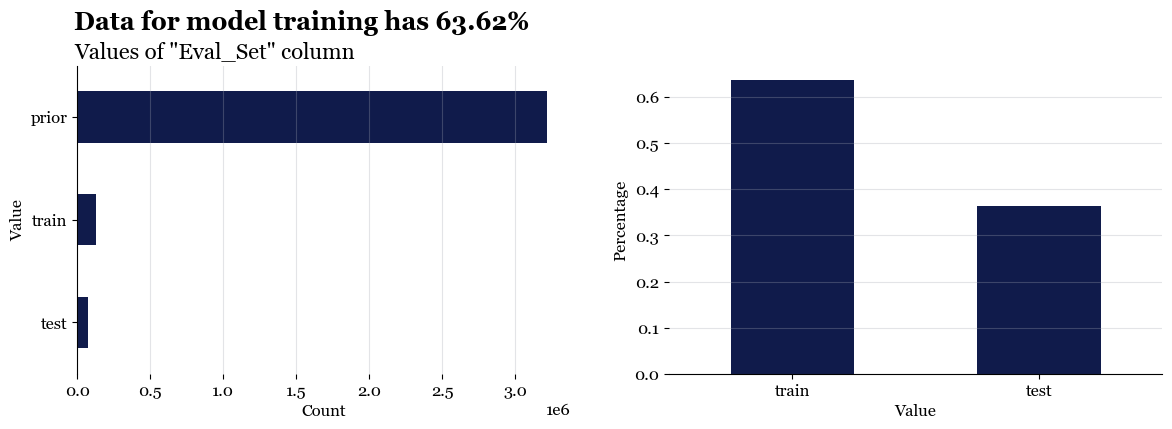

Eval_Set
train    0.636291
test     0.363709
Name: proportion, dtype: float64

In [18]:
# Plot `Eval_set` distribution
fig, ax = plt.subplots(1, 2, figsize=[14, 4])
plt.suptitle('Data for model training has 63.62%',
             ha='left', x=0.123, size=18,
             weight='bold', y=1.02)
fig.text(0.123, 0.9, 'Values of "Eval_Set" column',
         ha='left', size=16)
dfs['orders']['Eval_Set'] \
    .value_counts() \
    .sort_values(ascending=True) \
    .plot.barh(color=juan_colors[0], ax=ax[0])
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Value')
ax[0].grid(True, color=juan_colors[2],
           axis='x', alpha=0.3)
ax[0].spines[['top', 'right', 'bottom']].set_visible(False)
dfs['orders'][dfs['orders']['Eval_Set'] != 'prior']['Eval_Set'] \
    .value_counts(normalize=True) \
    .plot.bar(color=juan_colors[0], ax=ax[1])
ax[1].set_xlabel('Value')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)
ax[1].set_ylabel('Percentage')
ax[1].grid(True, color=juan_colors[2],
           axis='y', alpha=0.3)
ax[1].spines[['top', 'right', 'left']].set_visible(False)
plt.show()

# Show the table of the second plot normalized
dfs['orders'][dfs['orders']['Eval_Set'] != 'prior']['Eval_Set'] \
    .value_counts(normalize=True)

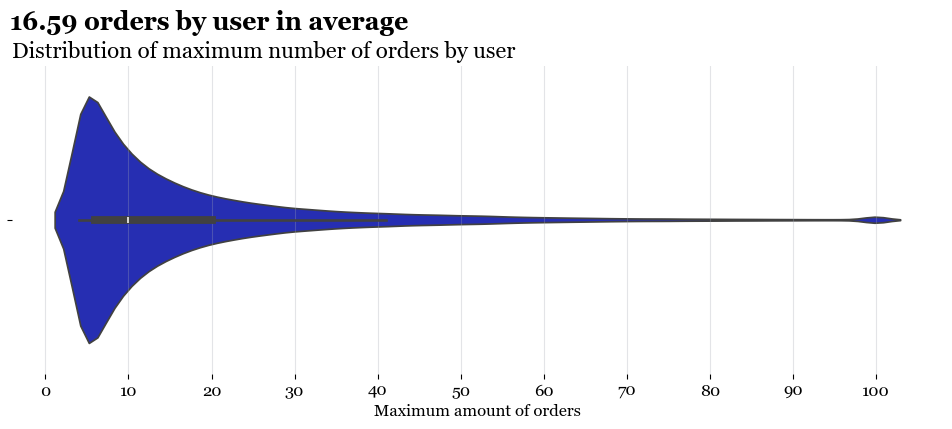

count    206209.000000
mean         16.590367
std          16.654774
min           4.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: Order_Number, dtype: float64

In [19]:
# Plot the max `Order_Number` distribution
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('16.59 orders by user in average',
             x=0.123, y=1.02,
             ha='left', size=18,
             weight='bold')
plt.title('Distribution of maximum number of orders by user',
          size=16, loc='left')
sns.violinplot(x=dfs['orders'].groupby('User_Id')['Order_Number'].max().values,
               color=juan_colors[4], orient='h',
               inner='box')
plt.xlabel('Maximum amount of orders')
plt.xticks(range(0, 110, 10))
plt.grid(True, color=juan_colors[2],
         axis='x', alpha=0.3)
ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
plt.show()

# Describe statistically
dfs['orders'].groupby('User_Id')['Order_Number'].max().describe()

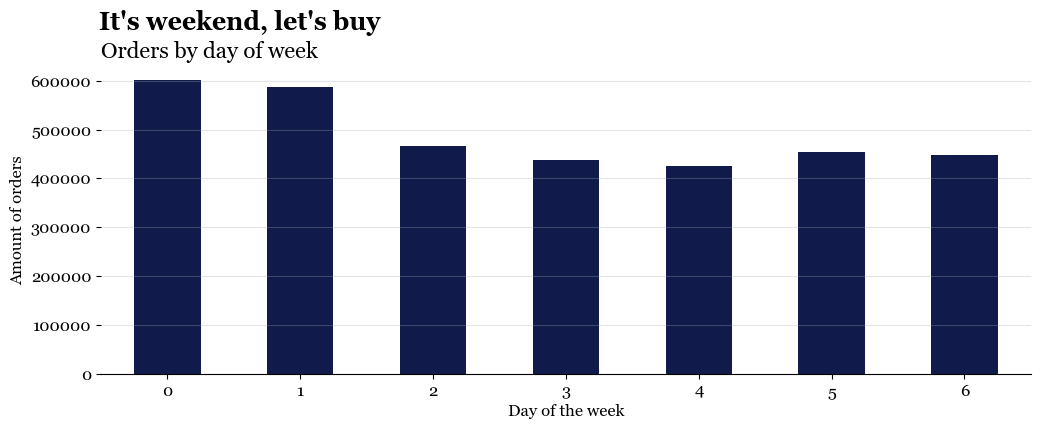

Order_Dow
0    600905
1    587478
2    467260
3    436972
4    426339
5    453368
6    448761
Name: Order_Id, dtype: int64

In [20]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle("It's weekend, let's buy",
             ha='left', x=0.123,
             weight='bold', size=18,
             y=1.02)
plt.title('Orders by day of week',
          loc='left', size=16)
dfs['orders'] \
    .groupby('Order_Dow')['Order_Id'] \
    .count() \
    .plot \
    .bar(color=juan_colors[0])
plt.xlabel('Day of the week')
plt.xticks(rotation=0)
plt.ylabel('Amount of orders')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

# Show table with plot data
dfs['orders'].groupby('Order_Dow')['Order_Id'].count()

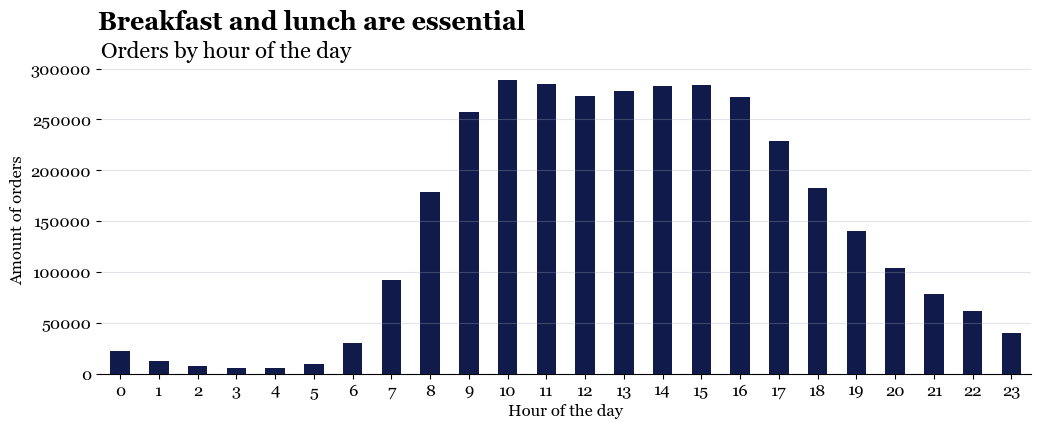

Order_Hour_Of_Day
0      22758
1      12398
2       7539
3       5474
4       5527
5       9569
6      30529
7      91868
8     178201
9     257812
10    288418
11    284728
12    272841
13    277999
14    283042
15    283639
16    272553
17    228795
18    182912
19    140569
20    104292
21     78109
22     61468
23     40043
Name: Order_Id, dtype: int64

In [21]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Breakfast and lunch are essential',
             ha='left', x=0.123,
             weight='bold', size=18,
             y=1.02)
plt.title('Orders by hour of the day',
          loc='left', size=16)
dfs['orders'] \
    .groupby('Order_Hour_Of_Day')['Order_Id'] \
    .count() \
    .plot \
    .bar(color=juan_colors[0])
plt.xlabel('Hour of the day')
plt.xticks(rotation=0)
plt.ylabel('Amount of orders')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

# Show table with plot data
dfs['orders'].groupby('Order_Hour_Of_Day')['Order_Id'].count()

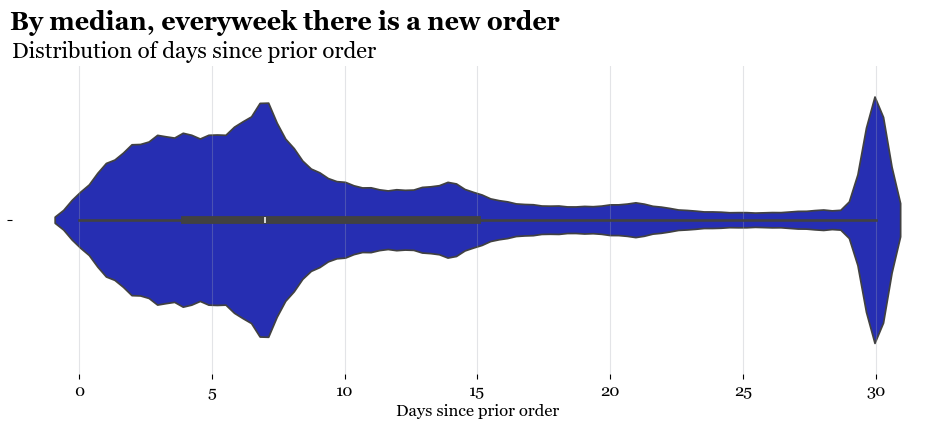

count    3.214874e+06
mean     1.111484e+01
std      9.206737e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: Days_Since_Prior_Order, dtype: float64

In [22]:
# Plot the max `Order_Number` distribution
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('By median, everyweek there is a new order',
             x=0.123, y=1.02,
             ha='left', size=18,
             weight='bold')
plt.title('Distribution of days since prior order',
          size=16, loc='left')
sns.violinplot(x=dfs['orders']['Days_Since_Prior_Order'],
               color=juan_colors[4], orient='h',
               inner='box')
plt.xlabel('Days since prior order')
plt.grid(True, color=juan_colors[2],
         axis='x', alpha=0.3)
ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
plt.show()

# Describe statistically
dfs['orders']['Days_Since_Prior_Order'].describe()

We first explore that `Order_Id` has only unique values and we do not have two orders with the same number. We have 206.209 unique users with some order and we have all their orders, we can say that because that is exactly the number of the last row and it is the same of the count of unique values.

In the column `Eval_Set` we have two types: 'prior' of all old orders and 'train' and 'test' that is the same set split of all of last orders by `User_Id`. To train our model, we have the 63.62% of last orders and 36.37% for testing it. The minimum amount of users orders is 4, the maximum is 100, the mean is 16.59 with a standard deviation of 16.65 and a median of 10 orders.

It seems like 0 and 1 are the highest volume days, we assume they are Saturdays and Sundays, thus Wednesday, day 4, is the day with the least amount of orders. About hour of the day, from 9 a.m. to 4 p.m. we have the most amount of orders in a single day, above 250.000 orders by hour, but since 11 p.m. to 6 a.m. we find the lest amount of orders below 50.000 orders by hour. And we find that the median of days since prior order is 7, meaning everyweek we have a new order, mainly weekends, and we have new peaks at 14 and 21, meaning everyweek.

We find a problem when some users has more than 100 orders, because the system send them to number 100 no matter what the real number is, and when there are more than 30 days since prior order because it does not matter how many days goes, the system classifies it in 30 days. 

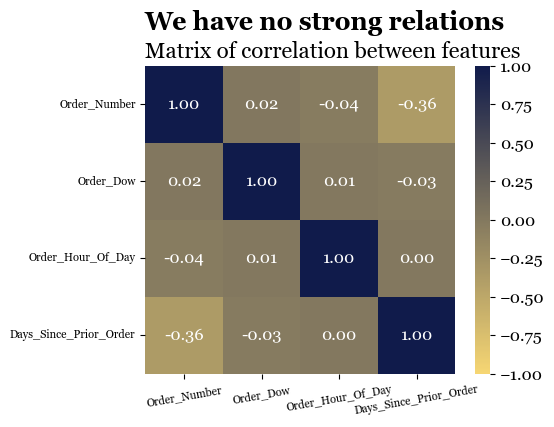

,Order_Number,Order_Dow,Order_Hour_Of_Day,Days_Since_Prior_Order
Order_Number,1.000000,0.015258,-0.035690,-0.360564
Order_Dow,0.015258,1.000000,0.005978,-0.028107
Order_Hour_Of_Day,-0.035690,0.005978,1.000000,0.001291
Days_Since_Prior_Order,-0.360564,-0.028107,0.001291,1.000000


In [23]:
fig, ax = plt.subplots(figsize=[5, 4])
plt.suptitle('We have no strong relations', ha='left',
             x=0.123, size=18,
             weight='bold', y=1.02)
plt.title('Matrix of correlation between features',
          size=16, loc='left')
sns.heatmap(dfs['orders'][['Order_Number',
                           'Order_Dow',
                           'Order_Hour_Of_Day',
                           'Days_Since_Prior_Order']].corr(),
            annot=True, ax=ax, cmap=juan_cmap,
            center=0, vmin=-1, vmax=1, fmt='.2f')
plt.xticks(rotation=10, size=8)
plt.yticks(size=8)
plt.show()

dfs['orders'][['Order_Number', 'Order_Dow',
               'Order_Hour_Of_Day', 'Days_Since_Prior_Order']].corr()

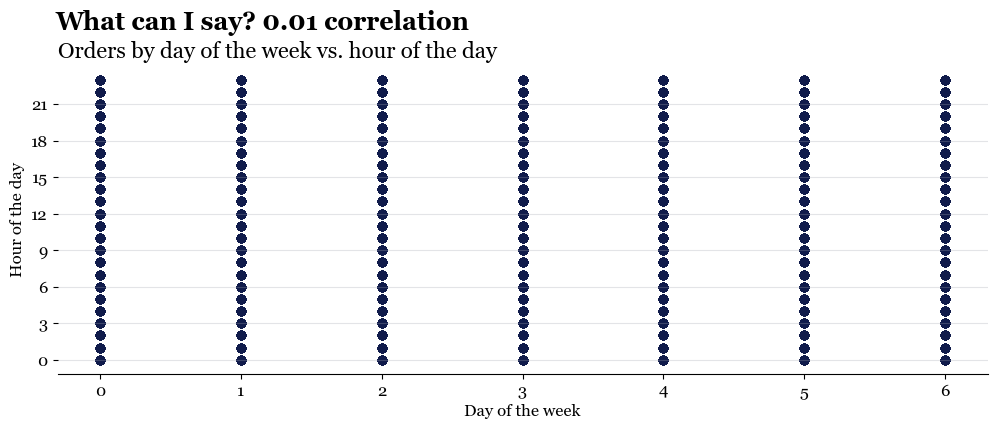

In [24]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('What can I say? 0.01 correlation',
             x=0.123, y=1.02,
             size=18, weight='bold',
             ha='left')
plt.title('Orders by day of the week vs. hour of the day',
          size=16, loc='left',)
plt.scatter(data=dfs['orders'],
            x='Order_Dow',
            y='Order_Hour_Of_Day',
            alpha=0.1,
            color=juan_colors[0])
plt.xlabel('Day of the week')
plt.ylabel('Hour of the day')
plt.yticks(range(0, 24, 3))
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

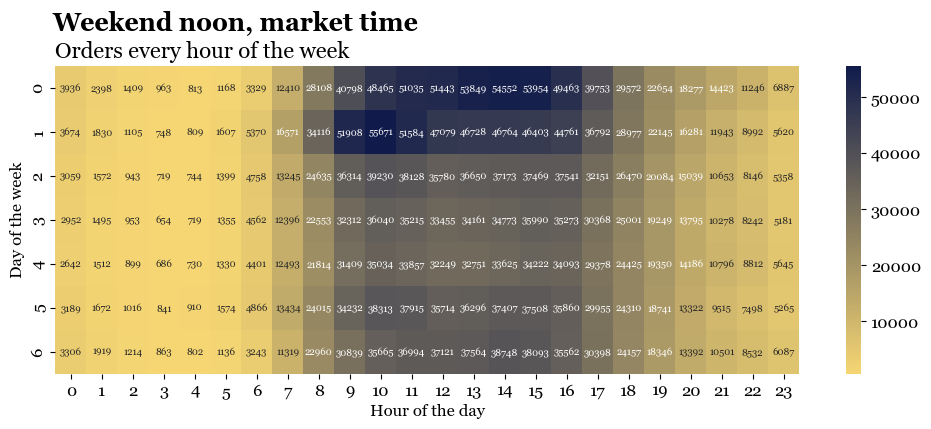

In [25]:
plt.figure(figsize=[12, 4])
plt.suptitle('Weekend noon, market time',
             size=18, ha='left',
             x=0.123, y=1.02, weight='bold')
plt.title('Orders every hour of the week',
          size='16', loc='left')
order_heatmap = dfs['orders'].pivot_table(index='Order_Dow',
                                          columns='Order_Hour_Of_Day',
                                          values='Order_Id',
                                          aggfunc='count')
sns.heatmap(order_heatmap, cmap=juan_cmap,
            annot=True, fmt='.0f',
            annot_kws={"fontsize": 7})
plt.xlabel('Hour of the day')
plt.ylabel('Day of the week')
plt.show()

We do not find any strong correlation between two features of the dataframe. For example, the order number of `Order_Number` has no high or low volume any special day of the week, any special hour of the day neither how many dance the user did his last order as we can see in the last plot depite the opacity of each marker on it.

Finally we plot a heatmap of the number of orders every hour of the week by day showing that days 0 and 1 around 9 a.m. to 5 p.m. have the highest volume of orders.

# <span style="color:#0F19C9">Orders Products Prior Dataframes</span>

We will concatenate the two dataframes of prior products that we split in the beginning. Then we will analyze each feature itself, next we will study the relations between them.

In [26]:
# Concat orders dataframes
to_concat = [dfs[f'orders_products__prior_{i}'] for i in range(1, 18)]
dfs['orders_products_prior'] = pd.concat(to_concat,
                                         ignore_index=True)

# Delete the original dataframes from dictionary
for i in range(1, 18):
    del dfs[f'orders_products__prior_{i}']

In [27]:
# Print some important values
print('{} unique orders in "Orders_Products_Prior"'.format(
    dfs['orders_products_prior']['Order_Id'].nunique()))
print('{} unique orders in "Orders" with prior "Eval_Set"'.format(
    dfs['orders'][dfs['orders']['Eval_Set'] == 'prior']['Order_Id'].nunique()))
print('-----')
print('{} unique orders in "Orders" dataframe'.format(
    dfs['orders']['Order_Id'].nunique()))

3214874 unique orders in "Orders_Products_Prior"
3214874 unique orders in "Orders" with prior "Eval_Set"
-----
3421083 unique orders in "Orders" dataframe


What we found is that the `Orders_Products_Prior` are all the products in the orders with `Eval_Set` equal to prior.

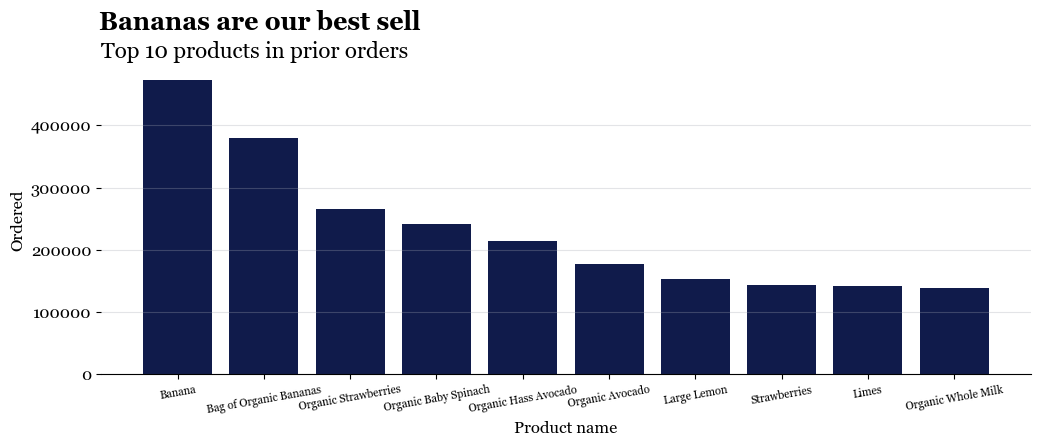

,Product_Name,Product_Id,count
0,Banana,24852,472565
1,Bag of Organic Bananas,13176,379450
2,Organic Strawberries,21137,264683
3,Organic Baby Spinach,21903,241921
4,Organic Hass Avocado,47209,213584
5,Organic Avocado,47766,176815
6,Large Lemon,47626,152657
7,Strawberries,16797,142951
8,Limes,26209,140627
9,Organic Whole Milk,27845,137905


In [28]:
# Get the top 10 products of prior evaluation set
top_10_products_prior = dfs['orders_products_prior']['Product_Id'] \
    .value_counts() \
    .head(10) \
    .reset_index() \
    .merge(dfs['products'][['Product_Id', 'Product_Name']],
           how='left',
           on='Product_Id')[['Product_Name', 'Product_Id', 'count']]

# Plot the best products
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Bananas are our best sell',
             ha='left', size=18,
             weight='bold',
             x=0.123, y=1.02)
plt.title('Top 10 products in prior orders',
          loc='left', size=16)
plt.bar(data=top_10_products_prior,
        x='Product_Name',
        height='count',
        color=juan_colors[0])
plt.xlabel('Product name')
plt.xticks(rotation=10, size=8)
plt.ylabel('Ordered')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

# Show the amount
top_10_products_prior

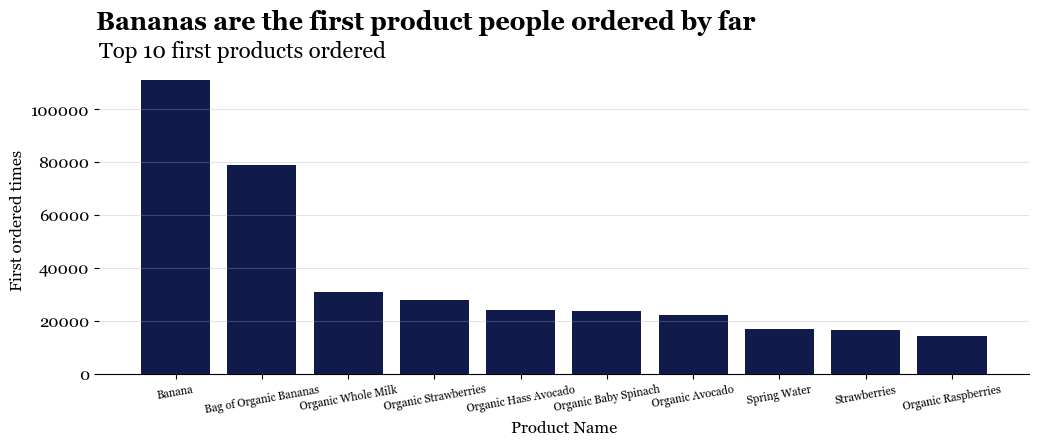

,Product_Name,Product_Id,count
0,Banana,24852,110916
1,Bag of Organic Bananas,13176,78988
2,Organic Whole Milk,27845,30927
3,Organic Strawberries,21137,27975
4,Organic Hass Avocado,47209,24116
5,Organic Baby Spinach,21903,23543
6,Organic Avocado,47766,22398
7,Spring Water,19660,16822
8,Strawberries,16797,16366
9,Organic Raspberries,27966,14393


In [29]:
top_10_first_products = dfs['orders_products_prior'][dfs['orders_products_prior']['Add_To_Cart_Order'] == 1]['Product_Id'] \
    .value_counts() \
    .head(10) \
    .reset_index() \
    .merge(dfs['products'][['Product_Id', 'Product_Name']],
           how='left',
           on='Product_Id')[['Product_Name', 'Product_Id', 'count']]

# Plot top 10 reordered products
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Bananas are the first product people ordered by far',
             ha='left', size=18,
             weight='bold', x=0.123,
             y=1.02)
plt.title('Top 10 first products ordered',
          size=16, loc='left')
plt.bar(x=top_10_first_products['Product_Name'],
        height=top_10_first_products['count'],
        color=juan_colors[0])
plt.xlabel('Product Name')
plt.xticks(rotation=10, size=8)
plt.ylabel('First ordered times')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

# Show the table
top_10_first_products

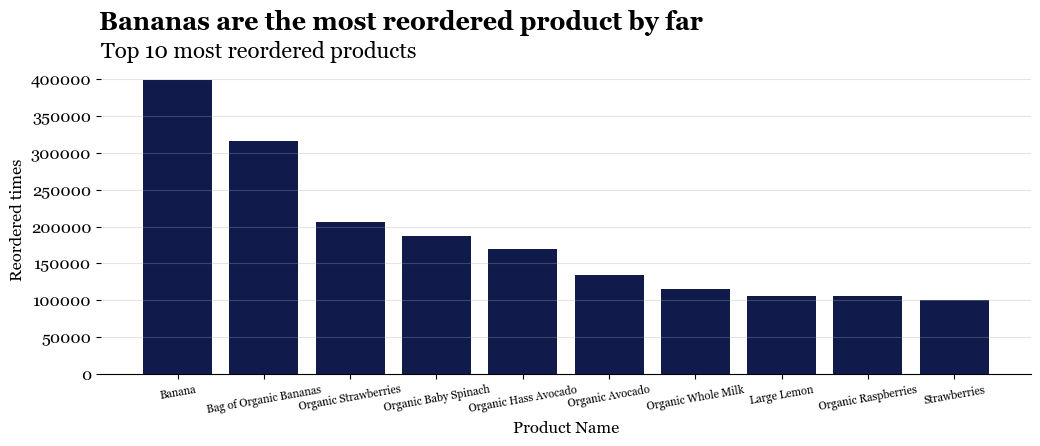

,Product_Name,Product_Id,count
0,Banana,24852,398609
1,Bag of Organic Bananas,13176,315913
2,Organic Strawberries,21137,205845
3,Organic Baby Spinach,21903,186884
4,Organic Hass Avocado,47209,170131
5,Organic Avocado,47766,134044
6,Organic Whole Milk,27845,114510
7,Large Lemon,47626,106255
8,Organic Raspberries,27966,105409
9,Strawberries,16797,99802


In [30]:
top_10_reordered_products = dfs['orders_products_prior'][dfs['orders_products_prior']['Reordered'] == 1]['Product_Id']  \
    .value_counts() \
    .head(10) \
    .reset_index() \
    .merge(dfs['products'][['Product_Id', 'Product_Name']],
           how='left',
           on='Product_Id')[['Product_Name', 'Product_Id', 'count']]

# Plot top 10 reordered products
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Bananas are the most reordered product by far',
             ha='left', size=18,
             weight='bold', x=0.123,
             y=1.02)
plt.title('Top 10 most reordered products',
          size=16, loc='left')
plt.bar(x=top_10_reordered_products['Product_Name'],
        height=top_10_reordered_products['count'],
        color=juan_colors[0])
plt.xlabel('Product Name')
plt.xticks(rotation=10, size=8)
plt.ylabel('Reordered times')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

# Show the table
top_10_reordered_products

In [31]:
# Count products reordered
reordered_prior_products = dfs['orders_products_prior']['Reordered'] \
    .replace({0: 'No', 1: 'Yes'}) \
    .value_counts()
reordered_prior_products

Reordered
Yes    19126536
No     13307953
Name: count, dtype: int64

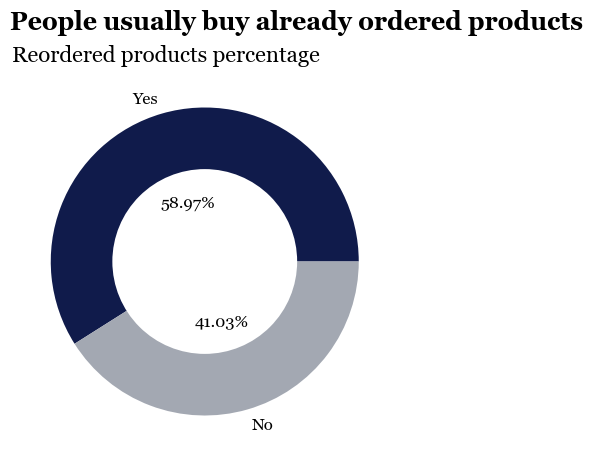

In [32]:
fig, ax = plt.subplots(figsize=[5, 5])
plt.suptitle('People usually buy already ordered products',
             ha='left', weight='bold',
             size=18, x=0.123, y=1)
plt.title('Reordered products percentage',
          loc='left', size=16)
reordered_prior_products \
    .plot.pie(autopct='%1.2f%%', pctdistance=0.4,
              colors=[juan_colors[0], juan_colors[2]],
              ax=ax)
plt.ylabel('')
hole = plt.Circle((0, 0), 0.6, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.show()

After we understand the nature of this dataframe, we found that in the prior set bananas are the best seller product. We start finding the best product ordered in general, then we find that bananas are the product people ordered first too and the product people reordered the most.

And finally we find that 53.97% of ordered products are reordered.

# <span style="color:#0F19C9">Orders Products Train Dataframes</span>

We will analyze each feature itself, and look for bias to train evaluation model. We will understand the way how the model is going to learn.

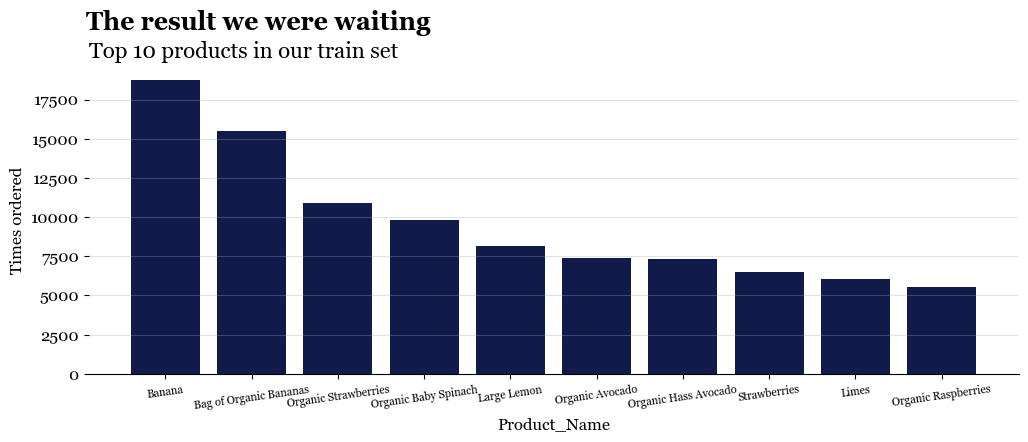

,Product_Name,Product_Id,count
0,Banana,24852,18726
1,Bag of Organic Bananas,13176,15480
2,Organic Strawberries,21137,10894
3,Organic Baby Spinach,21903,9784
4,Large Lemon,47626,8135
5,Organic Avocado,47766,7409
6,Organic Hass Avocado,47209,7293
7,Strawberries,16797,6494
8,Limes,26209,6033
9,Organic Raspberries,27966,5546


In [33]:
top_products_train = dfs['order_products__train']['Product_Id'] \
    .value_counts() \
    .head(10) \
    .reset_index() \
    .merge(dfs['products'][['Product_Id', 'Product_Name']],
           how='left')[['Product_Name',
                        'Product_Id',
                        'count']]

fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('The result we were waiting',
             ha='left', size=18,
             weight='bold',
             x=0.123, y=1.02)
plt.title('Top 10 products in our train set',
          size=16, loc='left')
plt.bar(x=top_products_train['Product_Name'],
        height=top_products_train['count'],
        color=juan_colors[0])
plt.xlabel('Product_Name')
plt.xticks(rotation=8, size=8)
plt.ylabel('Times ordered')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

# Show the table
top_products_train

In [34]:
# Count products reordered
reordered_train_products = dfs['order_products__train']['Reordered'] \
    .replace({0: 'No', 1: 'Yes'}) \
    .value_counts()
reordered_train_products

Reordered
Yes    828824
No     555793
Name: count, dtype: int64

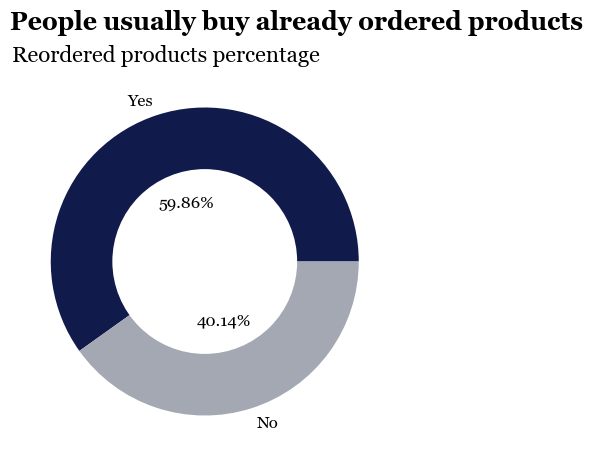

In [35]:
fig, ax = plt.subplots(figsize=[5, 5])
plt.suptitle('People usually buy already ordered products',
             ha='left', weight='bold',
             size=18, x=0.123, y=1)
plt.title('Reordered products percentage',
          loc='left', size=16)
reordered_train_products \
    .plot.pie(autopct='%1.2f%%', pctdistance=0.4,
              colors=[juan_colors[0], juan_colors[2]],
              ax=ax)
plt.ylabel('')
hole = plt.Circle((0, 0), 0.6, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.show()

We find some close values to prior set products so we can continue with the analysis because we can not determine any kind of bias in the train set.

# <span style="color:#0F19C9">Products Dataframe</span>

We will analyze each feature itself, but working with categorical features, we can not determine any relation between them.

In [36]:
# Find the uniqueness of the 'Product_Id'
dfs['products']['Product_Id'].nunique() == dfs['products'].shape[0]

True

In [37]:
# Find the biggest aisles
top_aisles = dfs['products']['Aisle_Id'] \
    .value_counts() \
    .head(10) \
    .reset_index() \
    .merge(dfs['aisles'],
           how='left',
           on='Aisle_Id')[['Aisle_Name',
                           'Aisle_Id',
                           'count']]

top_aisles

,Aisle_Name,Aisle_Id,count
0,Missing,100,1258
1,Candy Chocolate,45,1246
2,Ice Cream Ice,37,1091
3,Vitamins Supplements,47,1038
4,Yogurt,120,1026
5,Chips Pretzels,107,989
6,Tea,94,894
7,Packaged Cheese,21,891
8,Frozen Meals,38,880
9,Cookies Cakes,61,874


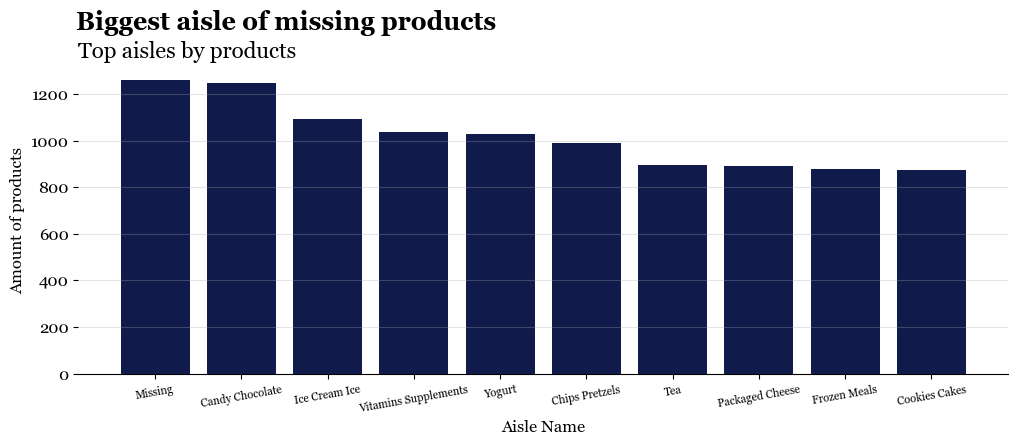

In [38]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Biggest aisle of missing products',
             ha='left', size=18,
             weight='bold', x=0.123,
             y=1.02)
plt.title('Top aisles by products',
          loc='left',
          size=16)
plt.bar(top_aisles['Aisle_Name'],
        height=top_aisles['count'],
        color=juan_colors[0])
plt.xlabel('Aisle Name')
plt.xticks(rotation=10, size=8)
plt.ylabel('Amount of products')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

In [39]:
# Find the biggest aisles
biggest_department = dfs['products']['Department_Id'] \
    .value_counts() \
    .head(10) \
    .reset_index() \
    .merge(dfs['departments'],
           how='left',
           on='Department_Id')[['Department_Name',
                                'Department_Id',
                                'count']]

biggest_department

,Department_Name,Department_Id,count
0,Personal Care,11,6563
1,Snacks,19,6264
2,Pantry,13,5371
3,Beverages,7,4365
4,Frozen,1,4007
5,Dairy Eggs,16,3449
6,Household,17,3085
7,Canned Goods,15,2092
8,Dry Goods Pasta,9,1858
9,Produce,4,1684


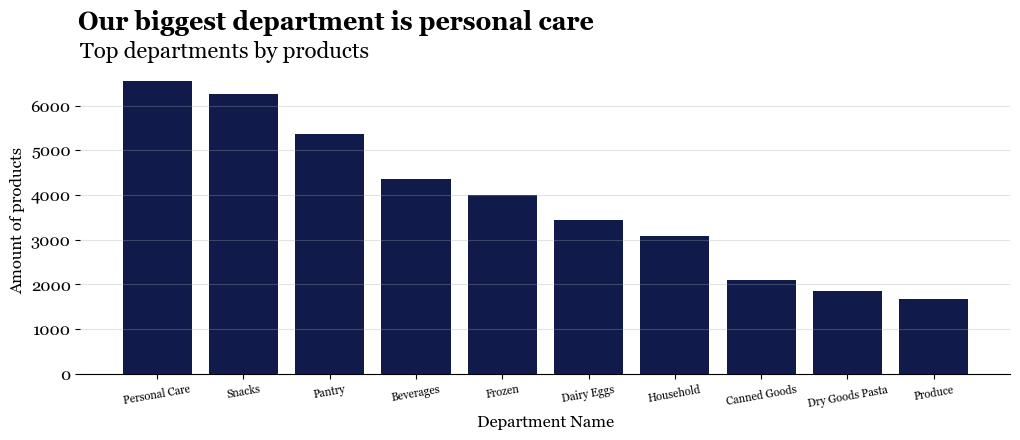

In [40]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Our biggest department is personal care',
             ha='left', size=18,
             weight='bold', x=0.123,
             y=1.02)
plt.title('Top departments by products',
          loc='left',
          size=16)
plt.bar(biggest_department['Department_Name'],
        height=biggest_department['count'],
        color=juan_colors[0])
plt.xlabel('Department Name')
plt.xticks(rotation=10, size=8)
plt.ylabel('Amount of products')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

We start looking for the uniqueness of the product id which is true, there are not two products with the same id. The top aisle by amount of product on it is `Missing` so, maybe we can ask for a new way to order those products. Finally, the biggest departments in the store are Personal Care with 6.563 products, followed by Snacks with 6.264 and Pantry with 5.371 products.

# <span style="color:#0F19C9">Analysis InterDataframes</span>

We will analyze the relationship between different dataframes.

In [41]:
# Merge products, with aisles and departments
products_with_department_and_aisle = dfs['orders_products_prior'][['Product_Id',
                                                                   'Add_To_Cart_Order']] \
    .merge(dfs['products'],
           how='left',
           on='Product_Id') \
    .merge(dfs['aisles'],
           how='left',
           on='Aisle_Id') \
    .merge(dfs['departments'],
           how='left',
           on='Department_Id')

products_with_department_and_aisle = products_with_department_and_aisle[['Product_Name',
                                                                         'Aisle_Name',
                                                                         'Department_Name',
                                                                         'Add_To_Cart_Order']]
products_with_department_and_aisle.head()

,Product_Name,Aisle_Name,Department_Name,Add_To_Cart_Order
0,Organic Egg Whites,Eggs,Dairy Eggs,1
1,Michigan Organic Kale,Fresh Vegetables,Produce,2
2,Garlic Powder,Spices Seasonings,Pantry,3
3,Coconut Butter,Oils Vinegars,Pantry,4
4,Natural Sweetener,Baking Ingredients,Pantry,5


In [42]:
# Find the top aisles in orders
top_aisles_in_orders = products_with_department_and_aisle['Aisle_Name'] \
    .value_counts() \
    .head(10)

top_aisles_in_orders

Aisle_Name
Fresh Fruits                     3642188
Fresh Vegetables                 3418021
Packaged Vegetables Fruits       1765313
Yogurt                           1452343
Packaged Cheese                   979763
Milk                              891015
Water Seltzer Sparkling Water     841533
Chips Pretzels                    722470
Soy Lactosefree                   638253
Bread                             584834
Name: count, dtype: int64

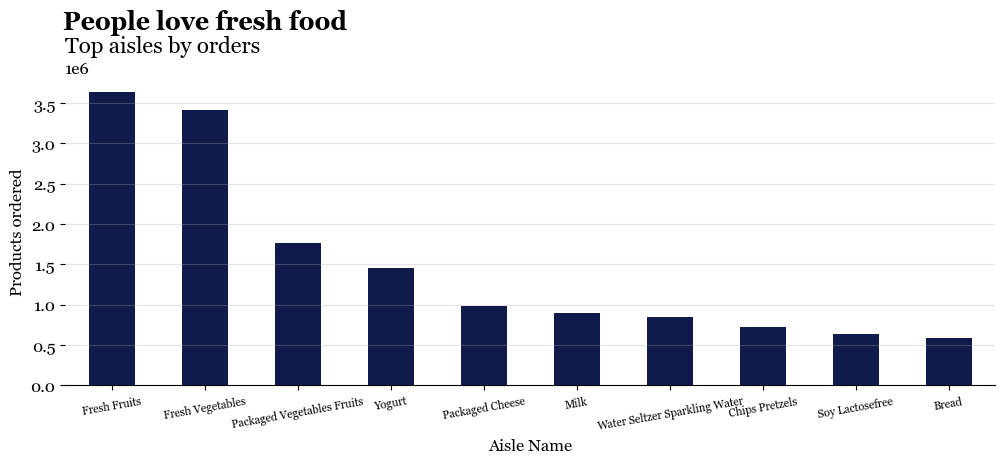

In [43]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('People love fresh food',
             ha='left', weight='bold',
             size=18, x=0.123,
             y=1.05)
plt.title('Top aisles by orders',
          loc='left', size=16)
top_aisles_in_orders \
    .plot.bar(color=juan_colors[0], ax=ax)
plt.xlabel('Aisle Name')
plt.xticks(rotation=10, size=8)
plt.ylabel('Products ordered')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

In [44]:
# Find the top departments in orders
top_departments_in_orders = products_with_department_and_aisle['Department_Name'] \
    .value_counts() \
    .head(10)

top_departments_in_orders

Department_Name
Produce            9479291
Dairy Eggs         5414016
Snacks             2887550
Beverages          2690129
Frozen             2236432
Pantry             1875577
Bakery             1176787
Canned Goods       1068058
Deli               1051249
Dry Goods Pasta     866627
Name: count, dtype: int64

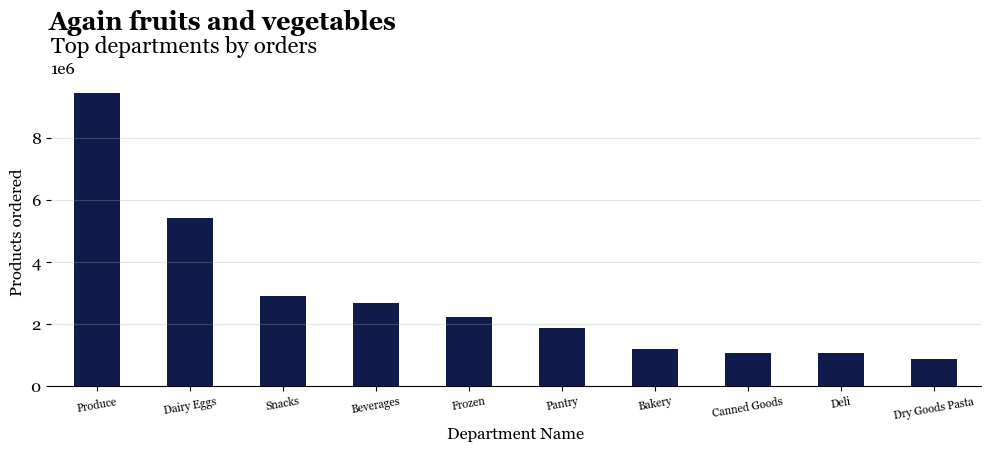

In [45]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Again fruits and vegetables',
             ha='left', weight='bold',
             size=18, x=0.123,
             y=1.05)
plt.title('Top departments by orders',
          loc='left', size=16)
top_departments_in_orders \
    .plot.bar(color=juan_colors[0], ax=ax)
plt.xlabel('Department Name')
plt.xticks(rotation=10, size=8)
plt.ylabel('Products ordered')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

In [46]:
# Find the first aisle they order
first_aisle = products_with_department_and_aisle[products_with_department_and_aisle['Add_To_Cart_Order'] == 1]['Aisle_Name'] \
    .value_counts() \
    .head(10)

first_aisle

Aisle_Name
Fresh Fruits                     445731
Fresh Vegetables                 237946
Milk                             189435
Water Seltzer Sparkling Water    160575
Packaged Vegetables Fruits       142252
Yogurt                           134394
Soy Lactosefree                   94175
Refrigerated                      73986
Packaged Cheese                   66994
Bread                             63510
Name: count, dtype: int64

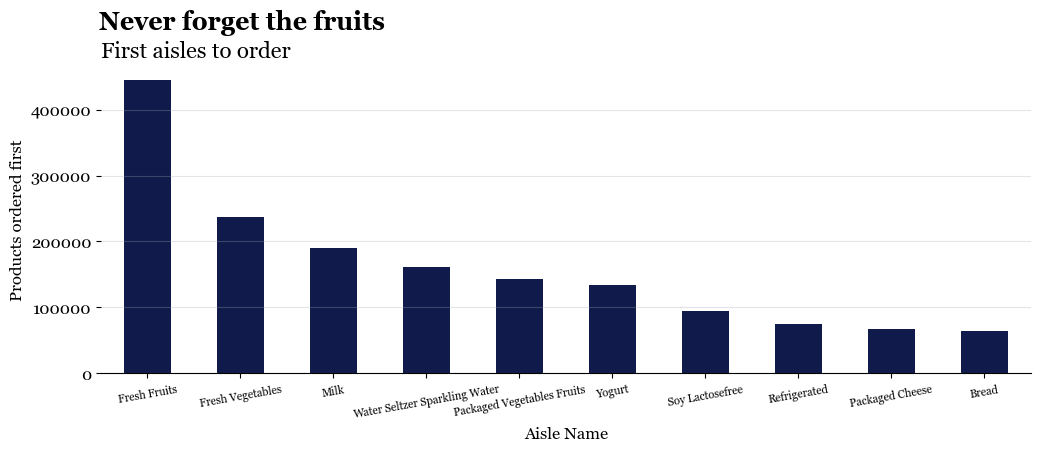

In [47]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Never forget the fruits',
             ha='left', weight='bold',
             size=18, x=0.123,
             y=1.02)
plt.title('First aisles to order',
          loc='left', size=16)
first_aisle \
    .plot.bar(color=juan_colors[0], ax=ax)
plt.xlabel('Aisle Name')
plt.xticks(rotation=10, size=8)
plt.ylabel('Products ordered first')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

In [48]:
# Find the first department they order
first_department = products_with_department_and_aisle[products_with_department_and_aisle['Add_To_Cart_Order'] == 1]['Department_Name'] \
    .value_counts() \
    .head(10)

first_department

Department_Name
Produce         901240
Dairy Eggs      650837
Beverages       409796
Snacks          225282
Frozen          182103
Pantry          154850
Bakery          117705
Deli             88297
Household        84805
Meat Seafood     71282
Name: count, dtype: int64

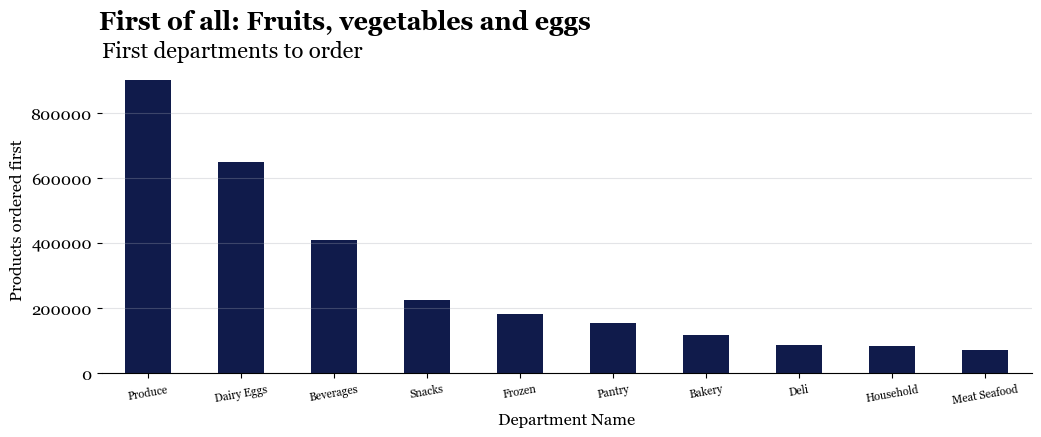

In [49]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('First of all: Fruits, vegetables and eggs',
             ha='left', weight='bold',
             size=18, x=0.123,
             y=1.02)
plt.title('First departments to order',
          loc='left', size=16)
first_department \
    .plot.bar(color=juan_colors[0], ax=ax)
plt.xlabel('Department Name')
plt.xticks(rotation=10, size=8)
plt.ylabel('Products ordered first')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

We ensure that fresh fruits and fresh vegetables give us the highest volume of products in orders, that is the part of our catalog that people always go to.

Talking about the first products people ordered, are a little bit different from the best sellers. For example Yogurt is the fourth aisle in amount of products ordered but is sixth in the first add to cart.

Finally we will understand the way people buys reordered products. We start saying that reordered products are the first people add to cart, but it is something that people forget, because the curve of number of order people reordered goes down, maybe we fail some strategy to remember them to buy ordered products in general.

In [54]:
# Filter the dataframe by reordered products
reordered_filter = dfs['order_products__train'][dfs['order_products__train']
                                                ['Reordered'] == 1]

# Merge filtered dataframe with 'Orders' dataframe
reordered_filter = reordered_filter.merge(dfs['orders'],
                                          on='Order_Id',
                                          how='left')
reordered_filter.head(2)

,Order_Id,Product_Id,Add_To_Cart_Order,Reordered,User_Id,Eval_Set,Order_Number,Order_Dow,Order_Hour_Of_Day,Days_Since_Prior_Order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0


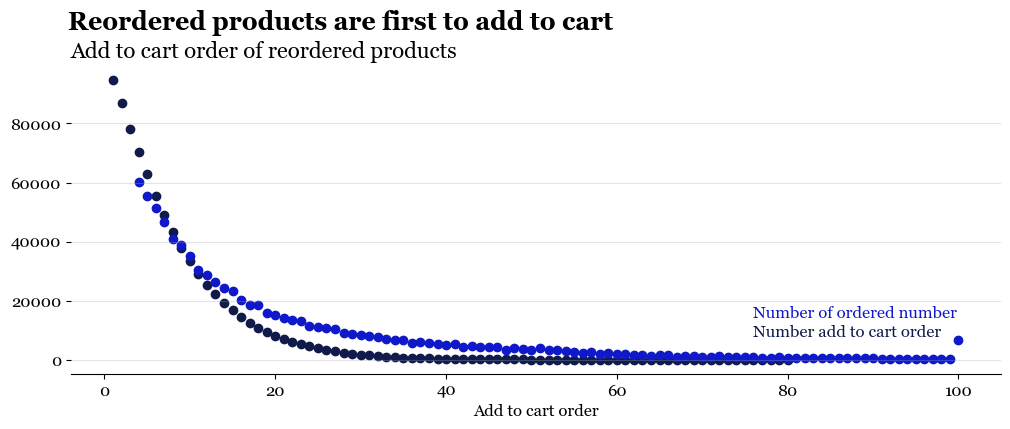

In [117]:
# Plot 'Add to cart order'
reordered_add_to = reordered_filter['Add_To_Cart_Order'].value_counts()
reordered_order_number = reordered_filter['Order_Number'].value_counts()

fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Reordered products are first to add to cart',
             size=18, ha='left', weight='bold',
             x=0.123, y=1.02)
plt.title('Add to cart order of reordered products',
          size=16, loc='left')
plt.scatter(reordered_add_to.index,
            reordered_add_to,
            color=juan_colors[0])
plt.annotate('Number add to cart order',
             xy=(reordered_add_to.index[-6],
                 reordered_add_to.values[-10] + 8e3),
             color=juan_colors[0])
plt.scatter(reordered_order_number.index,
            reordered_order_number,
            color=juan_colors[4])
plt.annotate('Number of ordered number',
             xy=(reordered_add_to.index[-6],
                 reordered_order_number.values[-10] + 14e3),
             color=juan_colors[4])
plt.xlabel('Add to cart order')
plt.grid(color=juan_colors[2],
         alpha=0.3, axis='y')
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

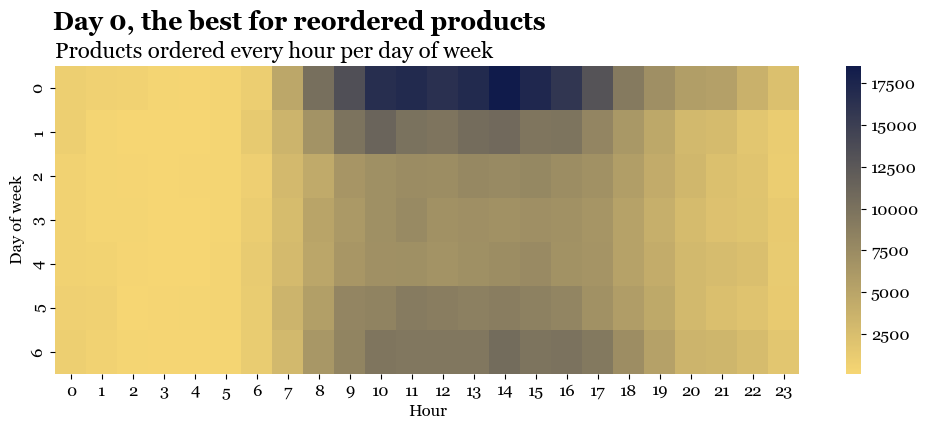

In [110]:
# Heatmap of times of reordered
reordered_time = reordered_filter.pivot_table(index='Order_Dow',
                                              columns='Order_Hour_Of_Day',
                                              values='Product_Id',
                                              aggfunc='count',
                                              fill_value=0)

fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Day 0, the best for reordered products',
             size=18, ha='left', weight='bold',
             x=0.123, y=1.02)
plt.title('Products ordered every hour per day of week',
          size=16, loc='left')
sns.heatmap(reordered_time,
            cmap=juan_cmap)
plt.xlabel('Hour')
plt.ylabel('Day of week')
plt.show()

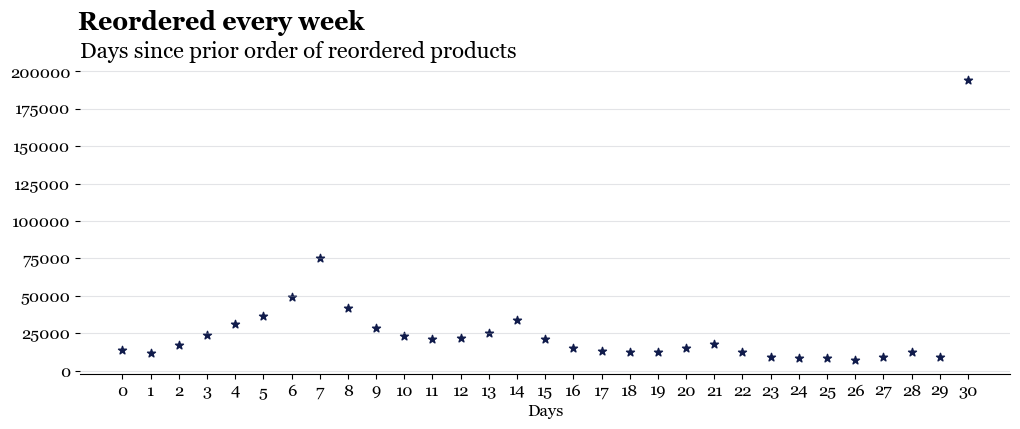

In [123]:
# Count days since prior orders
reordered_since_prior = reordered_filter['Days_Since_Prior_Order'].value_counts(
)

fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Reordered every week',
             size=18, ha='left', weight='bold',
             x=0.123, y=1.02)
plt.title('Days since prior order of reordered products',
          loc='left', size=16)
plt.scatter(reordered_since_prior.index,
            reordered_since_prior,
            color=juan_colors[0],
            marker='*')
plt.xlabel('Days')
plt.xticks(range(31))
plt.grid(color=juan_colors[2], alpha=0.3,
         axis='y')
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

Finally we found the dataframe `sample_submission` with the way how the company want us to give them the results of our model, so we are not going to study them.